In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("bitcoin_price_Training - Training.csv")
df.head()

Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [4]:
df.describe()

Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000

In [5]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df["Volume"] = df["Volume"].replace("-", np.nan)
df["Volume"] = df["Volume"].str.replace(",", "").astype(float)
df["Market Cap"] = df["Market Cap"].str.replace(",", "").astype(float)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Open", "High", "Low", "Close", "Volume", "Market Cap"]


## # Using boxplots

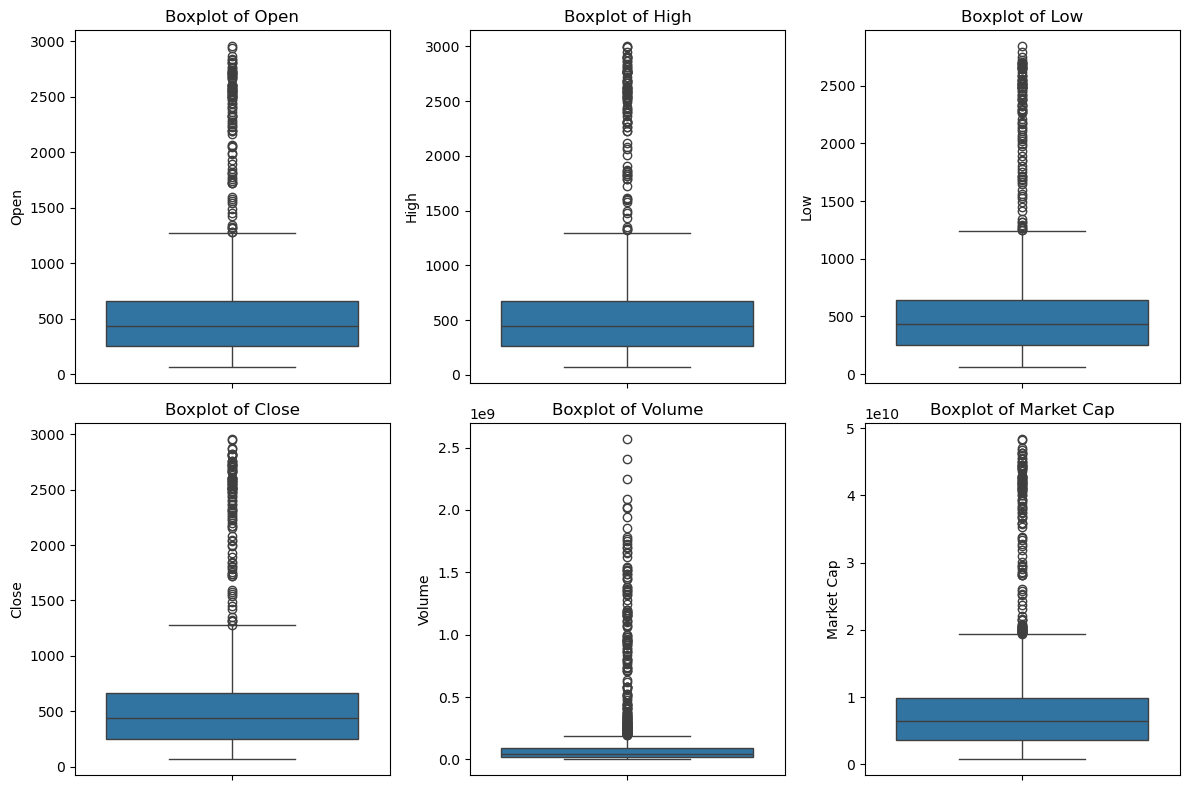

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [10]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5*IQR range
outliers_iqr = df[((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Number of outliers using IQR: {len(outliers_iqr)}")
outliers_iqr


Number of outliers using IQR: 183


Date     Open     High      Low    Close        Volume    Market Cap
0   2017-07-31  2763.24  2889.62  2720.61  2875.34  8.605750e+08  4.553580e+10
1   2017-07-30  2724.39  2758.53  2644.85  2757.18  7.059430e+08  4.489070e+10
2   2017-07-29  2807.02  2808.76  2692.80  2726.45  8.037460e+08  4.624670e+10
3   2017-07-28  2679.73  2897.45  2679.73  2809.01  1.380100e+09  4.414440e+10
4   2017-07-27  2538.71  2693.32  2529.34  2671.78  7.891040e+08  4.181650e+10
..         ...      ...      ...      ...      ...           ...           ...
410 2016-06-16   696.52   773.72   696.52   766.31  2.716340e+08  1.090890e+10
413 2016-06-13   671.65   716.00   664.49   704.38  2.432950e+08  1.051190e+10
414 2016-06-12   609.68   684.84   607.04   672.78  2.770850e+08  9.539850e+09
635 2015-11-04   403.66   495.56   380.55   411.56  2.639000e+08  5.973510e+09
636 2015-11-03   361.87   417.90   357.65   403.42  2.061620e+08  5.353680e+09

[183 rows x 7 columns]

In [11]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1


In [12]:
# Filter rows within the acceptable range (i.e., not outliers)
filter = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the filter to get a cleaned dataset
df_cleaned = df[filter]


In [13]:
# Check shape before and after
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (1556, 7)
Cleaned dataset shape: (1373, 7)


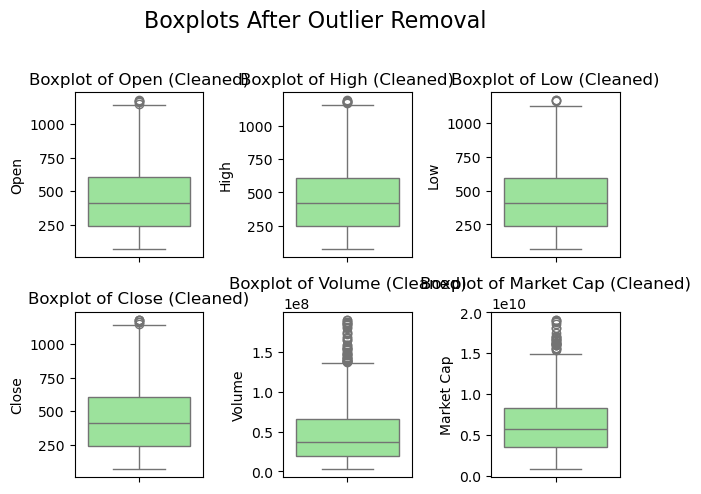

In [14]:
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[col], color='lightgreen')
    plt.title(f"Boxplot of {col} (Cleaned)")

plt.suptitle("Boxplots After Outlier Removal", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 1.Analyse change of price in bitcoin overtime

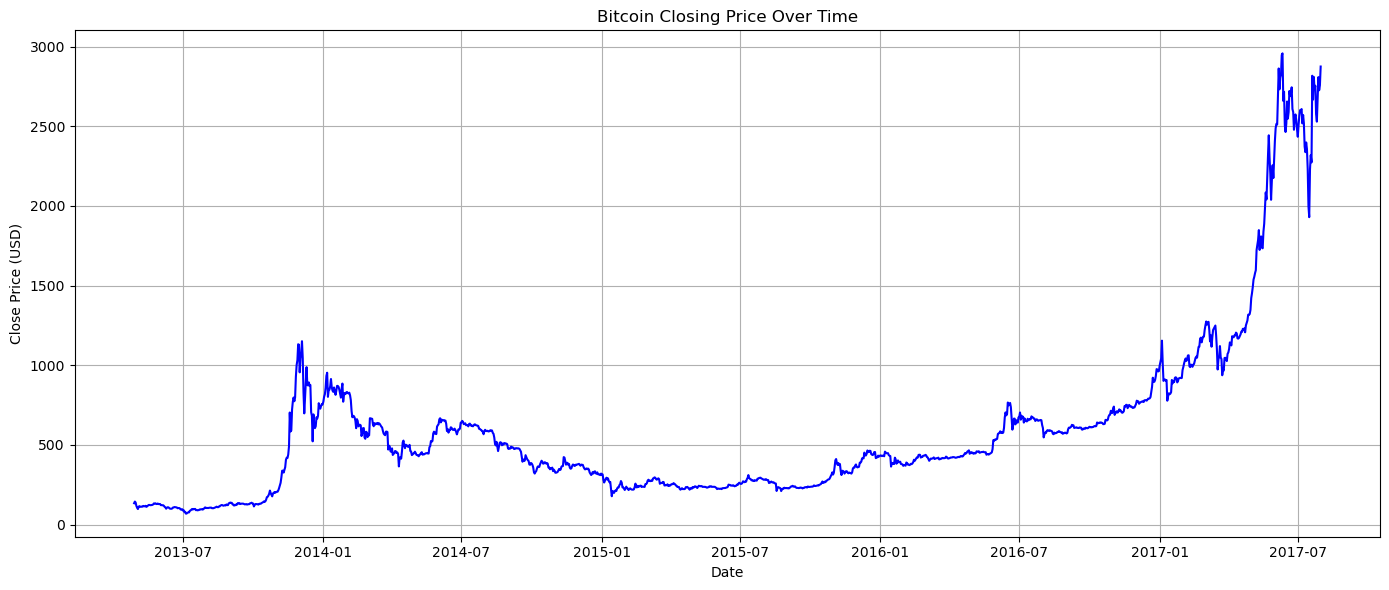

In [15]:
# Plot Closing price over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Calculate daily change in closing price
df['Price Change'] = df['Close'].diff()

# Calculate daily % change in closing price
df['% Change'] = df['Close'].pct_change() * 100

# Show first few rows
df[['Date', 'Close', 'Price Change', '% Change']].head()


Date    Close  Price Change  % Change
0 2017-07-31  2875.34           NaN       NaN
1 2017-07-30  2757.18       -118.16 -4.109427
2 2017-07-29  2726.45        -30.73 -1.114545
3 2017-07-28  2809.01         82.56  3.028113
4 2017-07-27  2671.78       -137.23 -4.885351

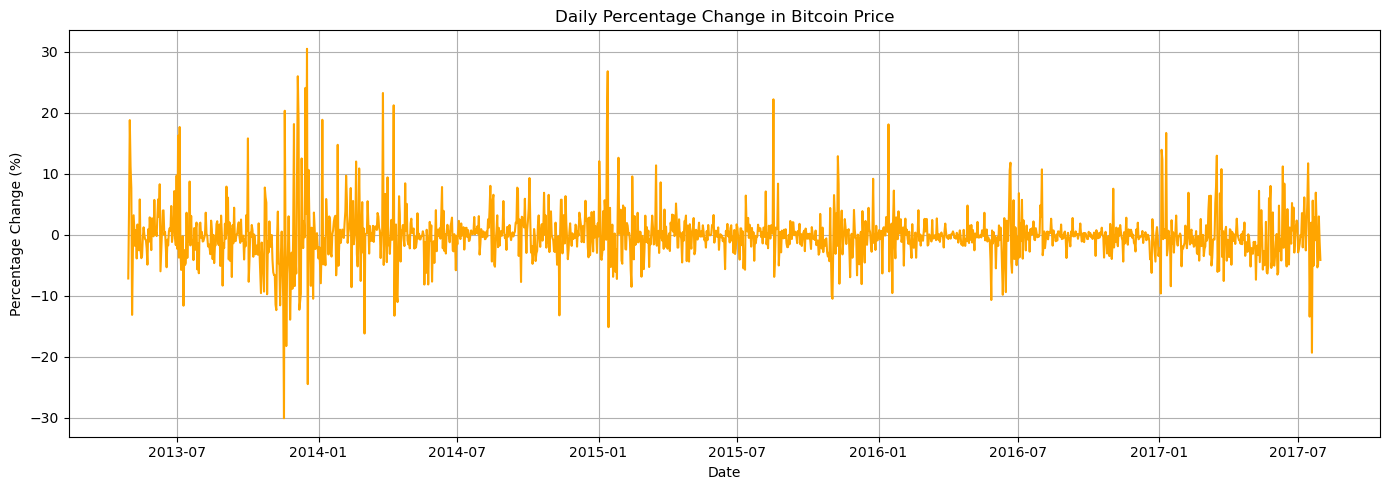

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['% Change'], color='orange')
plt.title('Daily Percentage Change in Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
print("Summary of Daily Price Changes:")
print(df['Price Change'].describe())

print("\nSummary of Daily % Changes:")
print(df['% Change'].describe())


Summary of Daily Price Changes:
count    1555.000000
mean       -1.762785
std        37.203845
min      -544.170000
25%        -6.770000
50%        -0.670000
75%         3.950000
max       298.480000
Name: Price Change, dtype: float64

Summary of Daily % Changes:
count    1555.000000
mean       -0.106103
std         4.296276
min       -30.054295
25%        -1.773698
50%        -0.191509
75%         1.109513
max        30.499330
Name: % Change, dtype: float64


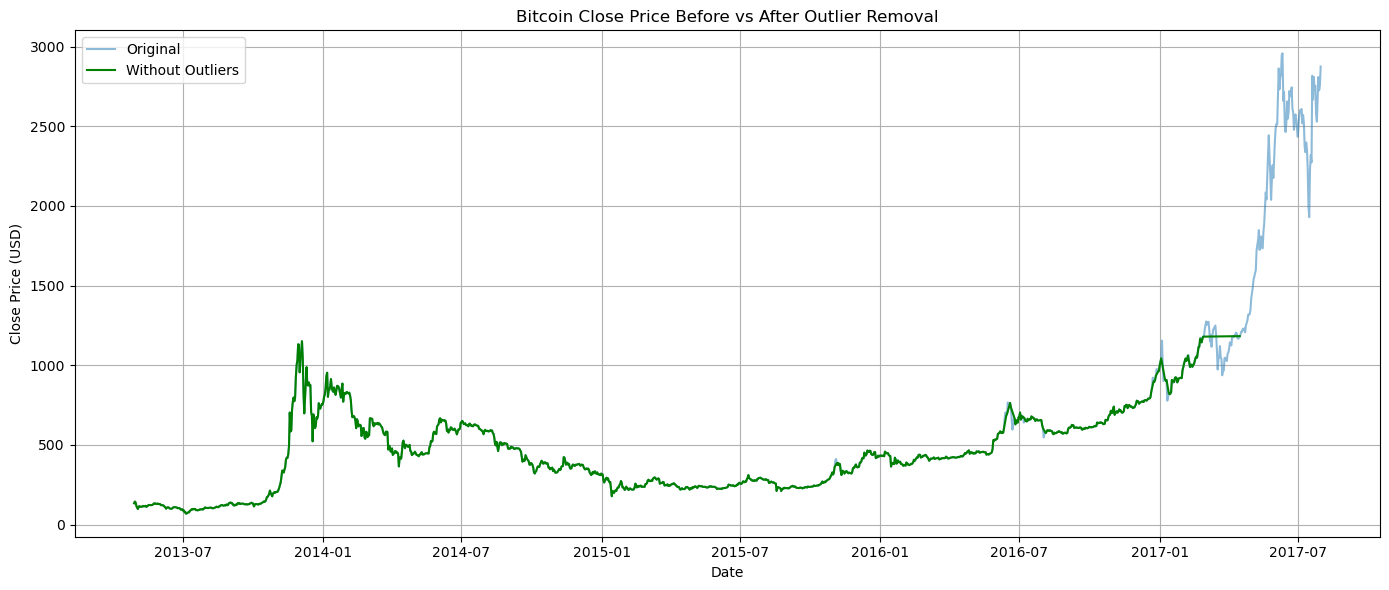

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Original', alpha=0.5)
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Without Outliers', color='green')
plt.title('Bitcoin Close Price Before vs After Outlier Removal')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2.Analysing bitcoin prices using candle stick chart

In [20]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [21]:
import plotly.graph_objects as go

# Date column is in datetime format and sorted
df_cleaned = df_cleaned.sort_values("Date")
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df_cleaned['Date'],
    open=df_cleaned['Open'],
    high=df_cleaned['High'],
    low=df_cleaned['Low'],
    close=df_cleaned['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Customize layout
fig.update_layout(
    title='Bitcoin Price Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    height=600
)

# Show the chart
fig.show()


# 3.Analysing closing price in depth

In [22]:
# Summary statistics of the Close price
df_cleaned["Close"].describe()


count    1373.000000
mean      435.700102
std       234.811524
min        68.430000
25%       242.300000
50%       415.480000
75%       605.690000
max      1182.940000
Name: Close, dtype: float64

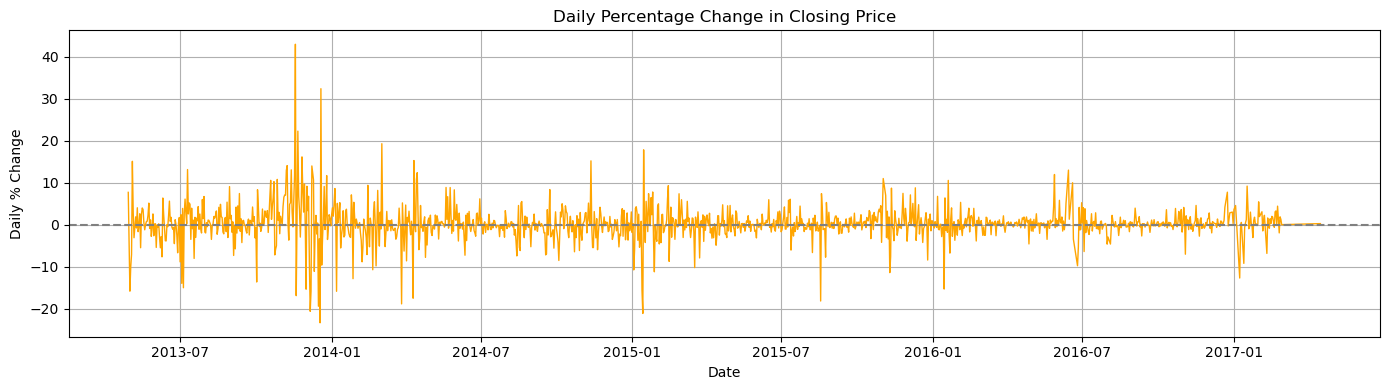

In [23]:
df_cleaned["Daily Change (%)"] = df_cleaned["Close"].pct_change() * 100

plt.figure(figsize=(14, 4))
plt.plot(df_cleaned["Date"], df_cleaned["Daily Change (%)"], color="orange", linewidth=1)
plt.title("Daily Percentage Change in Closing Price")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


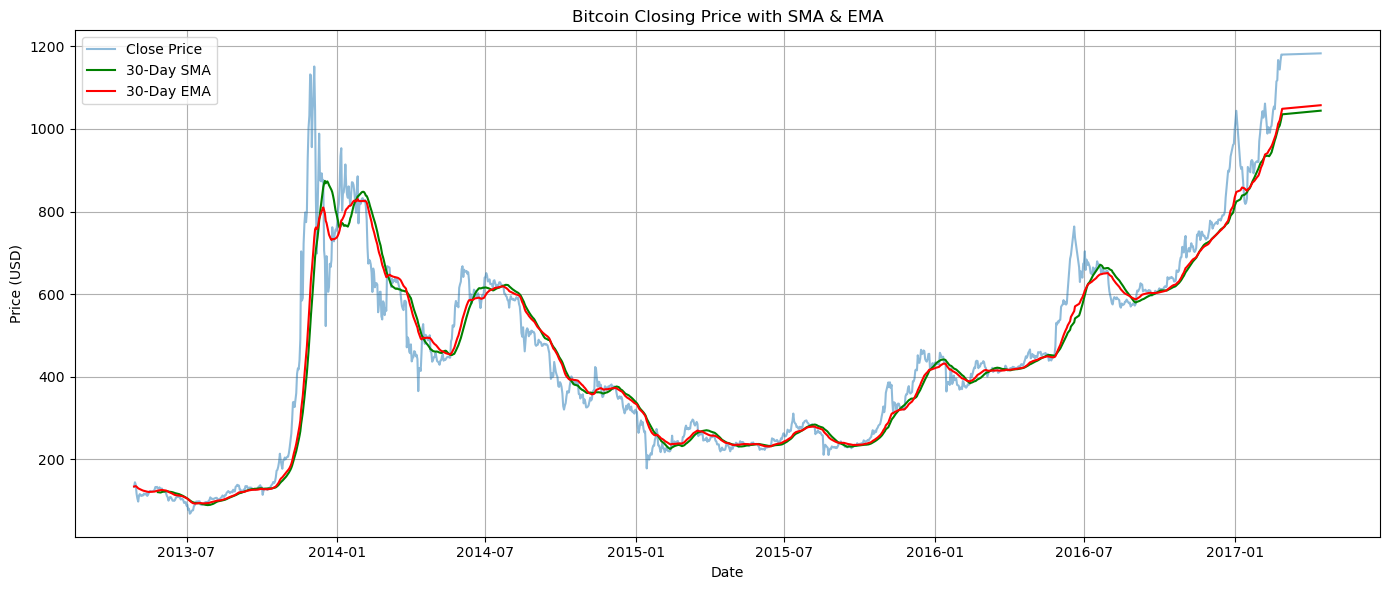

In [24]:
df_cleaned["SMA_30"] = df_cleaned["Close"].rolling(window=30).mean()
df_cleaned["EMA_30"] = df_cleaned["Close"].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_cleaned["Date"], df_cleaned["Close"], label='Close Price', alpha=0.5)
plt.plot(df_cleaned["Date"], df_cleaned["SMA_30"], label='30-Day SMA', color='green')
plt.plot(df_cleaned["Date"], df_cleaned["EMA_30"], label='30-Day EMA', color='red')
plt.title("Bitcoin Closing Price with SMA & EMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


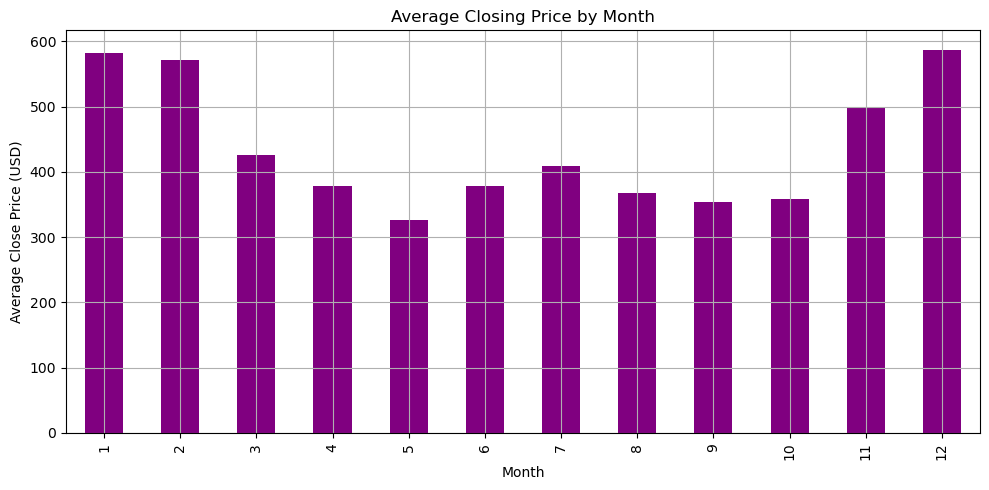

In [25]:
df_cleaned["Month"] = df_cleaned["Date"].dt.month
monthly_avg = df_cleaned.groupby("Month")["Close"].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='purple')
plt.title("Average Closing Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Close Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


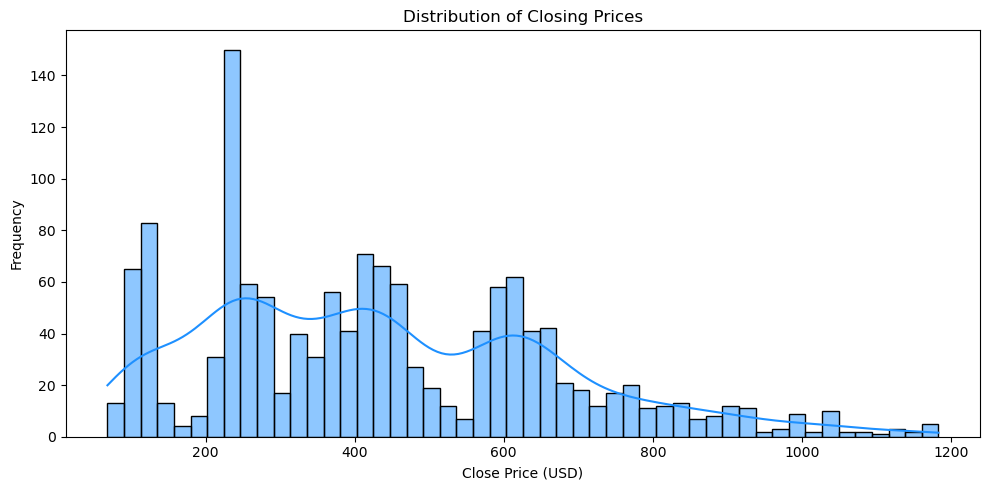

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Close"], kde=True, bins=50, color='dodgerblue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# 4.Perform analysis on closing price on yearly quarterly and monthly basis

In [27]:
# Make sure Date is datetime
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Create time-based columns
df_cleaned["Year"] = df_cleaned["Date"].dt.year
df_cleaned["Quarter"] = df_cleaned["Date"].dt.to_period("Q")
df_cleaned["Month"] = df_cleaned["Date"].dt.month
df_cleaned["Month_Name"] = df_cleaned["Date"].dt.strftime('%B')


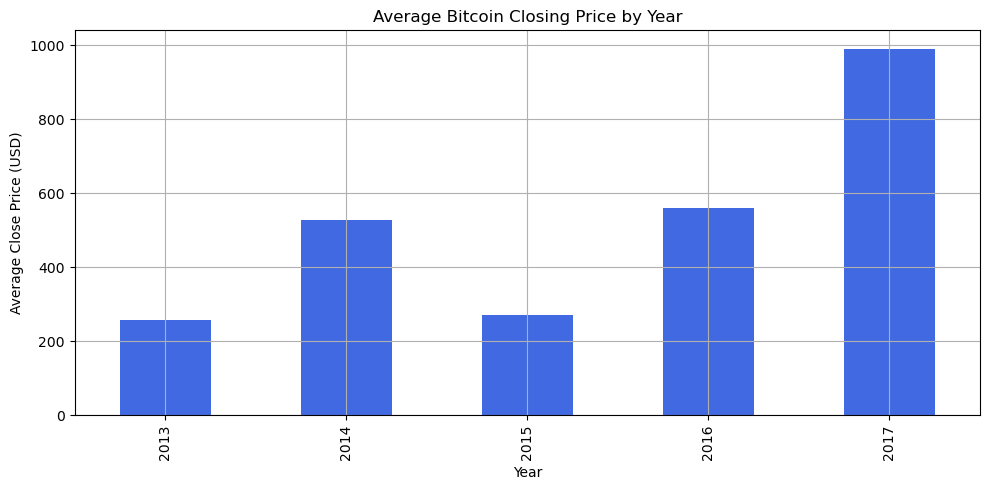

In [28]:
yearly_avg = df_cleaned.groupby("Year")["Close"].mean()

# Plot
plt.figure(figsize=(10, 5))
yearly_avg.plot(kind="bar", color="royalblue")
plt.title("Average Bitcoin Closing Price by Year")
plt.ylabel("Average Close Price (USD)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


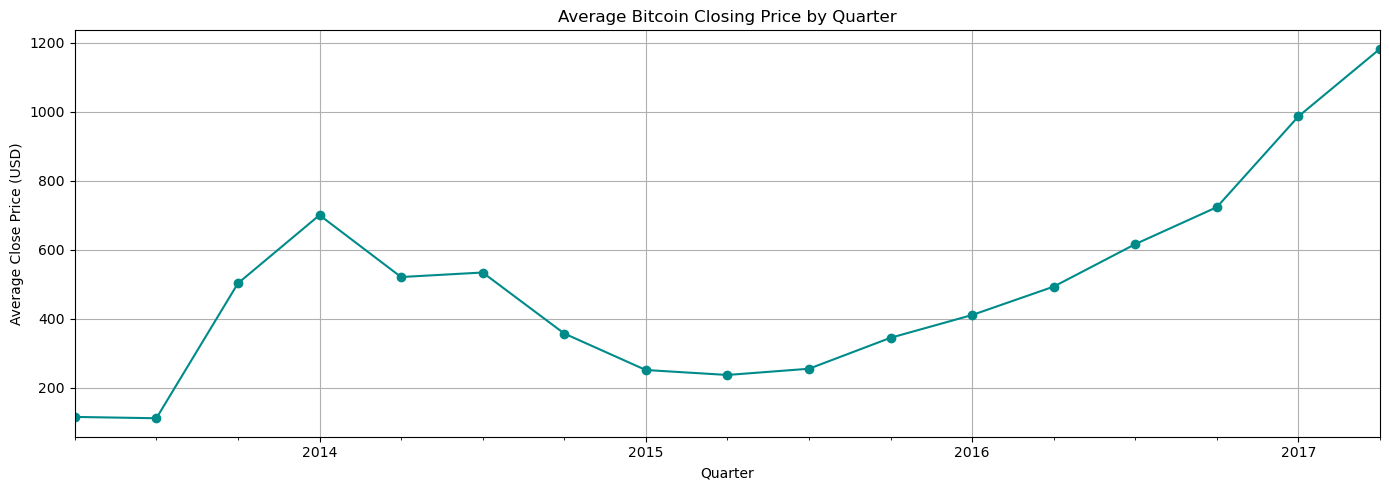

In [29]:
quarterly_avg = df_cleaned.groupby("Quarter")["Close"].mean()

plt.figure(figsize=(14, 5))
quarterly_avg.plot(marker='o', color='darkcyan')
plt.title("Average Bitcoin Closing Price by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Close Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


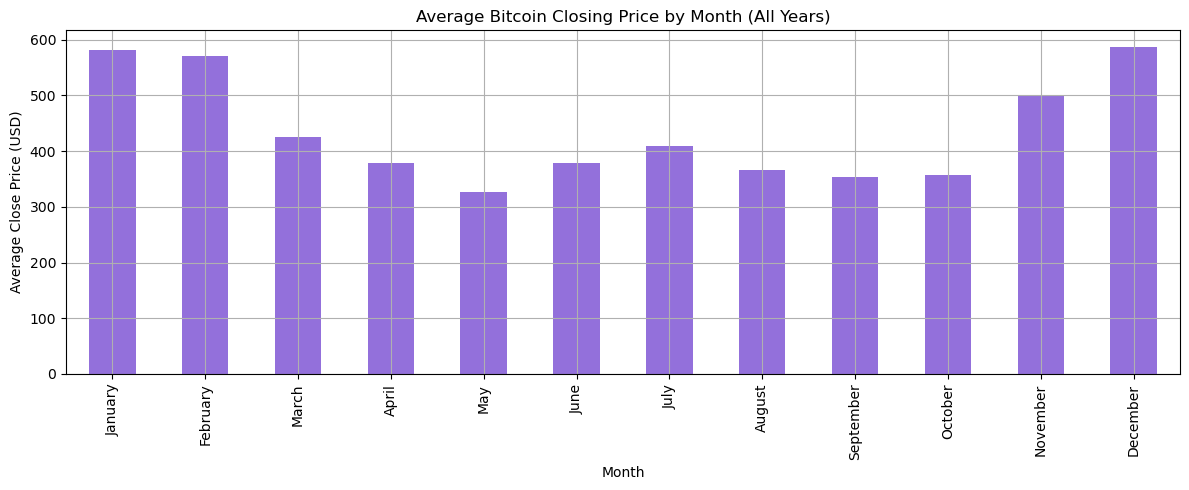

In [30]:
monthly_avg = df_cleaned.groupby("Month_Name")["Close"].mean()

# To keep correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

plt.figure(figsize=(12, 5))
monthly_avg.plot(kind='bar', color='mediumpurple')
plt.title("Average Bitcoin Closing Price by Month (All Years)")
plt.ylabel("Average Close Price (USD)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.Analysing daily change in price of stocks

In [31]:
# Sort by date just in case
df_cleaned = df_cleaned.sort_values("Date")

# Absolute daily price change
df_cleaned["Daily Change ($)"] = df_cleaned["Close"].diff()

# Percentage daily change
df_cleaned["Daily Change (%)"] = df_cleaned["Close"].pct_change() * 100


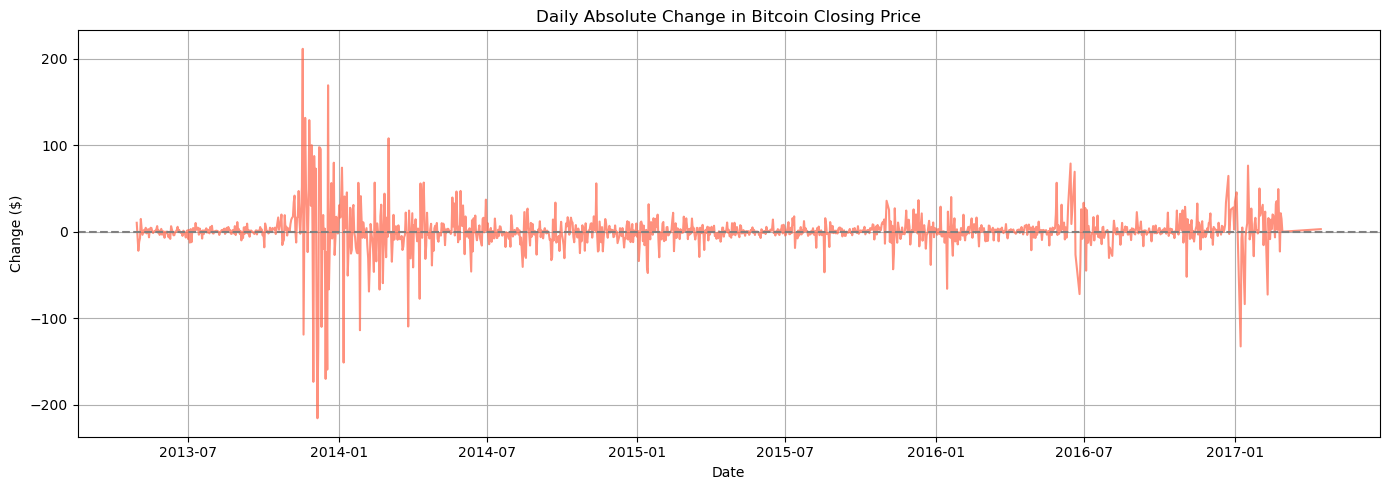

In [32]:
plt.figure(figsize=(14, 5))
plt.plot(df_cleaned["Date"], df_cleaned["Daily Change ($)"], color='tomato', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Daily Absolute Change in Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Change ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


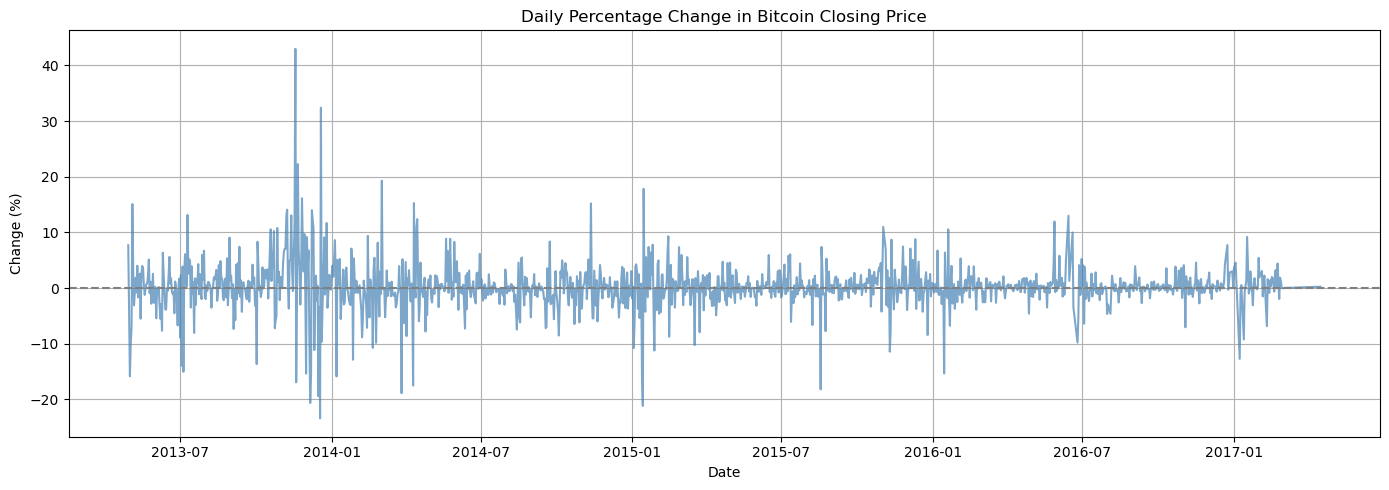

In [33]:
plt.figure(figsize=(14, 5))
plt.plot(df_cleaned["Date"], df_cleaned["Daily Change (%)"], color='steelblue', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Daily Percentage Change in Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Quick summary of volatility
print("Average Daily Change ($):", df_cleaned["Daily Change ($)"].mean())
print("Average Daily Change (%):", df_cleaned["Daily Change (%)"].mean())
print("Max Single-Day Increase ($):", df_cleaned["Daily Change ($)"].max())
print("Max Single-Day Drop ($):", df_cleaned["Daily Change ($)"].min())


Average Daily Change ($): 0.7643804664723034
Average Daily Change (%): 0.24709755166550285
Max Single-Day Increase ($): 211.44999999999993
Max Single-Day Drop ($): -215.65999999999985
